In [66]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [67]:
data_12800 = 'all_condition_stat_12800_filtered_max.csv'

In [68]:
data = pd.read_csv("./data/"+data_12800)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300,down
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300,down
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300,down
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300,down
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,583.231211,3.575957,2.872385,2.802993,0.030818,24.041893,1.967909,5.678236,50.651660,41.327268,...,0.027200,-4.553875,4.258986,-0.195173,-0.025525,4,6.0,5000,450,up
3562,580.421189,3.143293,2.918746,2.238513,0.010163,23.272022,2.152586,6.442916,54.398373,43.387011,...,0.032404,-4.331138,3.992545,-0.186024,0.438358,4,6.0,5000,450,up
3563,604.216465,3.415435,2.680779,2.670480,0.002692,20.326331,1.737523,4.027836,53.139158,42.652204,...,-0.054790,-4.232807,4.408266,0.124733,-0.246908,4,6.0,5000,500,up
3564,602.037207,3.527300,2.891382,2.728853,0.015913,22.578368,1.957310,5.237861,53.070980,42.595514,...,-0.041764,-4.056287,4.755409,0.231296,-0.233711,4,6.0,5000,500,up


In [69]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [70]:
groups_ae = down.groupby('Ae')

In [71]:
ae_1 = groups_ae.get_group(1)
ae_1 = ae_1.reset_index(drop=True)
ae_1 = ae_1.drop(['Milling_Type'], axis=1)

ae_2 = groups_ae.get_group(2)
ae_2 = ae_2.reset_index(drop=True)
ae_2 = ae_2.drop(['Milling_Type'], axis=1)

ae_3 = groups_ae.get_group(3)
ae_3 = ae_3.reset_index(drop=True)
ae_3 = ae_3.drop(['Milling_Type'], axis=1)

ae_4 = groups_ae.get_group(4)
ae_4 = ae_4.reset_index(drop=True)
ae_4 = ae_4.drop(['Milling_Type'], axis=1)

In [72]:
ae_1

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.145759,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.142357,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.179684,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.148164,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,0.145978,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,301.533447,1.372375,0.997282,1.069149,0.014276,5.530416,0.941566,0.137314,59.587176,45.610631,...,0.684117,-0.061212,-1.594613,1.982821,0.385901,-0.390109,1,6.0,5000,450
439,300.676211,1.360925,0.986924,1.065691,0.005888,5.282510,0.936012,0.140999,58.669628,45.139191,...,0.691896,-0.071460,-1.635130,1.942525,0.379606,-0.470276,1,6.0,5000,450
440,319.479772,1.262637,0.905077,0.998391,0.007739,4.993738,0.974980,0.371896,58.598644,45.156217,...,0.736260,-0.077075,-1.714508,2.095557,0.459636,-0.359237,1,6.0,5000,500
441,319.438713,1.227647,0.878053,0.973565,0.008649,4.904982,0.958846,0.306386,58.450574,45.094747,...,0.762446,-0.088972,-1.830835,2.091143,0.423732,-0.462227,1,6.0,5000,500


# ***다운밀링***

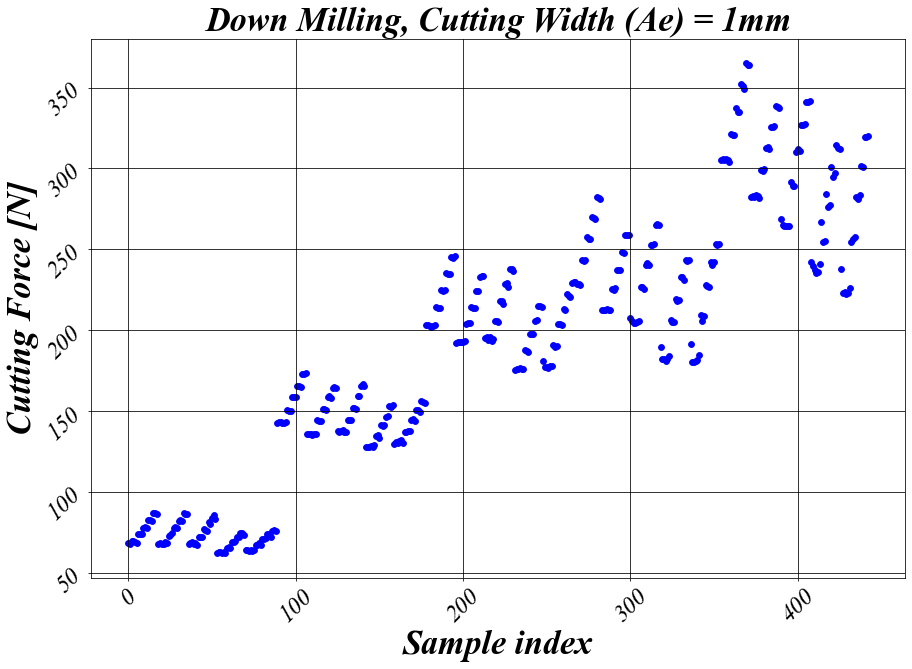

In [73]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 1mm',**tfont)
plt.scatter(range(0, len(ae_1['RMS_CF_max'])), ae_1['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

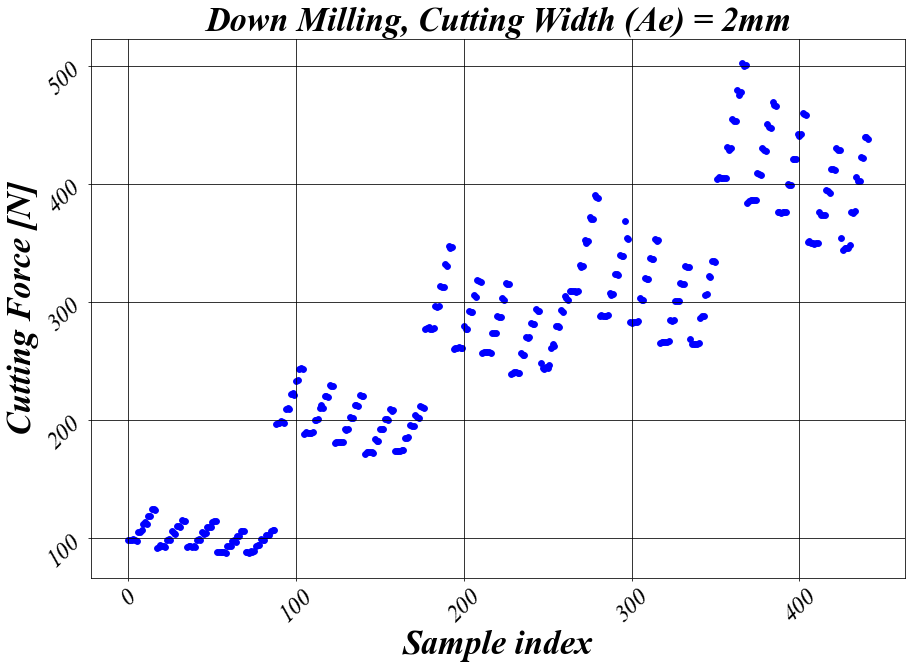

In [74]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 2mm',**tfont)
plt.scatter(range(0, len(ae_2['RMS_CF_max'])), ae_2['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

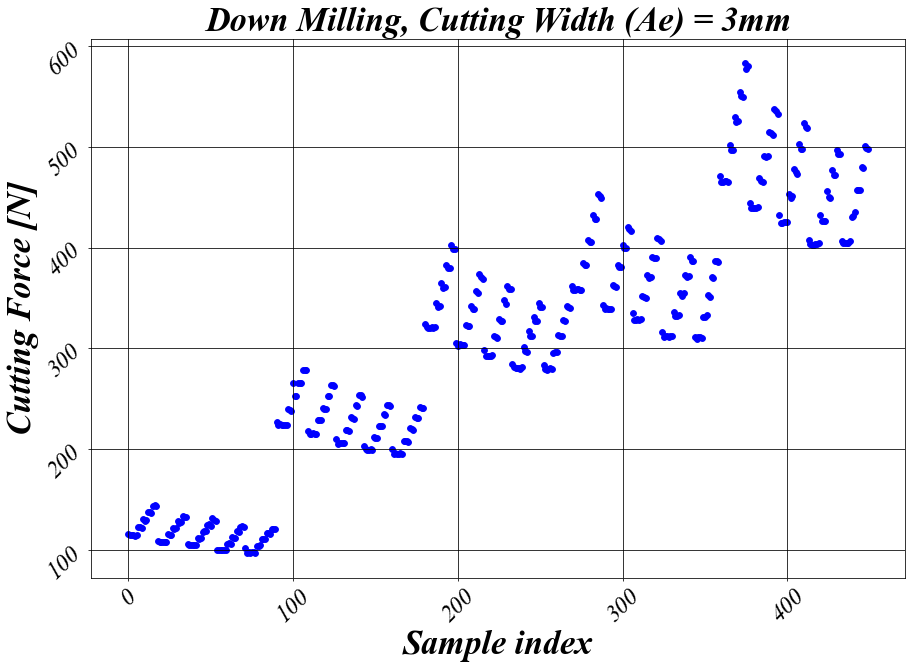

In [75]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 3mm',**tfont)
plt.scatter(range(0, len(ae_3['RMS_CF_max'])), ae_3['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

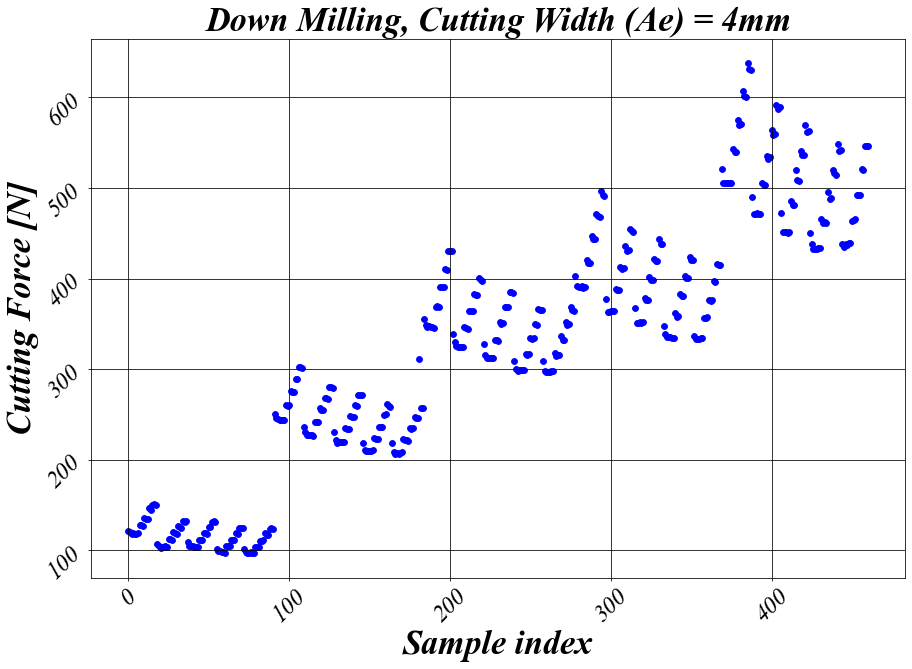

In [76]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Width (Ae) = 4mm',**tfont)
plt.scatter(range(0, len(ae_4['RMS_CF_max'])), ae_4['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

# ***Ae 1 test***

In [77]:
train = pd.concat([ae_2, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [78]:
X_test = ae_1.iloc[: , 1:]
y_test = ae_1['RMS_CF_max']

In [79]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [80]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:317.45866	validation_0-mape:0.98780	validation_1-rmse:202.23637	validation_1-mape:0.98210
[1]	validation_0-rmse:314.33827	validation_0-mape:0.97790	validation_1-rmse:199.44405	validation_1-mape:0.96771
[2]	validation_0-rmse:311.24908	validation_0-mape:0.96811	validation_1-rmse:196.67839	validation_1-mape:0.95351
[3]	validation_0-rmse:308.19076	validation_0-mape:0.95844	validation_1-rmse:193.93967	validation_1-mape:0.93948
[4]	validation_0-rmse:305.16301	validation_0-mape:0.94886	validation_1-rmse:191.22861	validation_1-mape:0.92558
[5]	validation_0-rmse:302.16544	validation_0-mape:0.93938	validation_1-rmse:188.54494	validation_1-mape:0.91182
[6]	validation_0-rmse:299.19782	validation_0-mape:0.92999	validation_1-rmse:185.88839	validation_1-mape:0.89820
[7]	validation_0-rmse:296.25981	validation_0-mape:0.92069	validation_1-rmse:183.25872	validation_1-mape:0.88472
[8]	validation_0-rmse:293.35051	validation_0-mape:0.91148	validation_1-rmse:180.70713	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[34]	validation_0-rmse:227.09046	validation_0-mape:0.70182	validation_1-rmse:122.64745	validation_1-mape:0.57821
[35]	validation_0-rmse:224.87116	validation_0-mape:0.69481	validation_1-rmse:120.74081	validation_1-mape:0.56868
[36]	validation_0-rmse:222.67064	validation_0-mape:0.68785	validation_1-rmse:118.74399	validation_1-mape:0.55861
[37]	validation_0-rmse:220.49471	validation_0-mape:0.68098	validation_1-rmse:116.87368	validation_1-mape:0.54922
[38]	validation_0-rmse:218.33747	validation_0-mape:0.67417	validation_1-rmse:114.90053	validation_1-mape:0.53938
[39]	validation_0-rmse:216.20487	validation_0-mape:0.66742	validation_1-rmse:113.10184	validation_1-mape:0.53033
[40]	validation_0-rmse:214.09009	validation_0-mape:0.66075	validation_1-rmse:111.22847	validation_1-mape:0.52057
[41]	validation_0-rmse:212.00016	validation_0-mape:0.65415	validation_1-rmse:109.30421	validation_1-mape:0.51106
[42]	validation_0-rmse:209.92752	validation_0-mape:0.64760	validation_1-rmse:107.53055	validatio

[107]	validation_0-rmse:111.32393	validation_0-mape:0.33781	validation_1-rmse:24.33991	validation_1-mape:0.08307
[108]	validation_0-rmse:110.24935	validation_0-mape:0.33445	validation_1-rmse:23.62670	validation_1-mape:0.08040
[109]	validation_0-rmse:109.18492	validation_0-mape:0.33113	validation_1-rmse:23.01117	validation_1-mape:0.07803
[110]	validation_0-rmse:108.13141	validation_0-mape:0.32784	validation_1-rmse:22.39197	validation_1-mape:0.07596
[111]	validation_0-rmse:107.08837	validation_0-mape:0.32459	validation_1-rmse:21.73020	validation_1-mape:0.07385
[112]	validation_0-rmse:106.05546	validation_0-mape:0.32136	validation_1-rmse:21.18382	validation_1-mape:0.07208
[113]	validation_0-rmse:105.03292	validation_0-mape:0.31817	validation_1-rmse:20.56900	validation_1-mape:0.07044
[114]	validation_0-rmse:104.01926	validation_0-mape:0.31500	validation_1-rmse:20.05851	validation_1-mape:0.06903
[115]	validation_0-rmse:103.01562	validation_0-mape:0.31186	validation_1-rmse:19.55267	validatio

[181]	validation_0-rmse:54.63602	validation_0-mape:0.16153	validation_1-rmse:31.40569	validation_1-mape:0.16496
[182]	validation_0-rmse:54.11841	validation_0-mape:0.15993	validation_1-rmse:31.80072	validation_1-mape:0.16702
[183]	validation_0-rmse:53.60591	validation_0-mape:0.15835	validation_1-rmse:32.11406	validation_1-mape:0.16877
[184]	validation_0-rmse:53.09718	validation_0-mape:0.15678	validation_1-rmse:32.47725	validation_1-mape:0.17078
[185]	validation_0-rmse:52.59511	validation_0-mape:0.15523	validation_1-rmse:32.81388	validation_1-mape:0.17263
[186]	validation_0-rmse:52.09766	validation_0-mape:0.15369	validation_1-rmse:33.18245	validation_1-mape:0.17456
[187]	validation_0-rmse:51.60567	validation_0-mape:0.15217	validation_1-rmse:33.47516	validation_1-mape:0.17621
[188]	validation_0-rmse:51.11782	validation_0-mape:0.15067	validation_1-rmse:33.80546	validation_1-mape:0.17802
[189]	validation_0-rmse:50.63488	validation_0-mape:0.14918	validation_1-rmse:34.11041	validation_1-mape:

[255]	validation_0-rmse:27.25429	validation_0-mape:0.07752	validation_1-rmse:51.10485	validation_1-mape:0.27136
[256]	validation_0-rmse:27.00381	validation_0-mape:0.07676	validation_1-rmse:51.28561	validation_1-mape:0.27228
[257]	validation_0-rmse:26.75584	validation_0-mape:0.07601	validation_1-rmse:51.46546	validation_1-mape:0.27324
[258]	validation_0-rmse:26.50817	validation_0-mape:0.07526	validation_1-rmse:51.65089	validation_1-mape:0.27419
[259]	validation_0-rmse:26.26485	validation_0-mape:0.07452	validation_1-rmse:51.83011	validation_1-mape:0.27511
[260]	validation_0-rmse:26.02364	validation_0-mape:0.07379	validation_1-rmse:51.99874	validation_1-mape:0.27600
[261]	validation_0-rmse:25.78509	validation_0-mape:0.07307	validation_1-rmse:52.17280	validation_1-mape:0.27689
[262]	validation_0-rmse:25.54907	validation_0-mape:0.07235	validation_1-rmse:52.34387	validation_1-mape:0.27778
[263]	validation_0-rmse:25.31331	validation_0-mape:0.07164	validation_1-rmse:52.51355	validation_1-mape:

[329]	validation_0-rmse:13.96942	validation_0-mape:0.03736	validation_1-rmse:60.54547	validation_1-mape:0.32009
[330]	validation_0-rmse:13.84733	validation_0-mape:0.03700	validation_1-rmse:60.63214	validation_1-mape:0.32051
[331]	validation_0-rmse:13.72652	validation_0-mape:0.03664	validation_1-rmse:60.71919	validation_1-mape:0.32097
[332]	validation_0-rmse:13.60731	validation_0-mape:0.03628	validation_1-rmse:60.80446	validation_1-mape:0.32141
[333]	validation_0-rmse:13.48908	validation_0-mape:0.03592	validation_1-rmse:60.88871	validation_1-mape:0.32185
[334]	validation_0-rmse:13.37208	validation_0-mape:0.03557	validation_1-rmse:60.96800	validation_1-mape:0.32224
[335]	validation_0-rmse:13.25653	validation_0-mape:0.03523	validation_1-rmse:61.05112	validation_1-mape:0.32267
[336]	validation_0-rmse:13.14162	validation_0-mape:0.03488	validation_1-rmse:61.13198	validation_1-mape:0.32307
[337]	validation_0-rmse:13.02812	validation_0-mape:0.03454	validation_1-rmse:61.20418	validation_1-mape:

[403]	validation_0-rmse:7.51847	validation_0-mape:0.01837	validation_1-rmse:64.93259	validation_1-mape:0.34285
[404]	validation_0-rmse:7.45966	validation_0-mape:0.01820	validation_1-rmse:64.97260	validation_1-mape:0.34306
[405]	validation_0-rmse:7.40071	validation_0-mape:0.01804	validation_1-rmse:65.01371	validation_1-mape:0.34327
[406]	validation_0-rmse:7.34313	validation_0-mape:0.01787	validation_1-rmse:65.05487	validation_1-mape:0.34347
[407]	validation_0-rmse:7.28581	validation_0-mape:0.01771	validation_1-rmse:65.09513	validation_1-mape:0.34369
[408]	validation_0-rmse:7.22851	validation_0-mape:0.01755	validation_1-rmse:65.13320	validation_1-mape:0.34387
[409]	validation_0-rmse:7.17270	validation_0-mape:0.01739	validation_1-rmse:65.17297	validation_1-mape:0.34407
[410]	validation_0-rmse:7.11739	validation_0-mape:0.01723	validation_1-rmse:65.21132	validation_1-mape:0.34426
[411]	validation_0-rmse:7.06281	validation_0-mape:0.01708	validation_1-rmse:65.25015	validation_1-mape:0.34445
[

[477]	validation_0-rmse:4.42515	validation_0-mape:0.00999	validation_1-rmse:67.15893	validation_1-mape:0.35404
[478]	validation_0-rmse:4.39701	validation_0-mape:0.00993	validation_1-rmse:67.17897	validation_1-mape:0.35414
[479]	validation_0-rmse:4.36917	validation_0-mape:0.00986	validation_1-rmse:67.20117	validation_1-mape:0.35426
[480]	validation_0-rmse:4.34172	validation_0-mape:0.00979	validation_1-rmse:67.22553	validation_1-mape:0.35438
[481]	validation_0-rmse:4.31447	validation_0-mape:0.00972	validation_1-rmse:67.24503	validation_1-mape:0.35448
[482]	validation_0-rmse:4.28813	validation_0-mape:0.00966	validation_1-rmse:67.26686	validation_1-mape:0.35459
[483]	validation_0-rmse:4.26156	validation_0-mape:0.00959	validation_1-rmse:67.28683	validation_1-mape:0.35469
[484]	validation_0-rmse:4.23581	validation_0-mape:0.00953	validation_1-rmse:67.30821	validation_1-mape:0.35481
[485]	validation_0-rmse:4.20979	validation_0-mape:0.00947	validation_1-rmse:67.33049	validation_1-mape:0.35492
[

[551]	validation_0-rmse:2.97340	validation_0-mape:0.00667	validation_1-rmse:68.25467	validation_1-mape:0.35972
[552]	validation_0-rmse:2.96061	validation_0-mape:0.00665	validation_1-rmse:68.26336	validation_1-mape:0.35977
[553]	validation_0-rmse:2.94740	validation_0-mape:0.00662	validation_1-rmse:68.27148	validation_1-mape:0.35980
[554]	validation_0-rmse:2.93489	validation_0-mape:0.00659	validation_1-rmse:68.28000	validation_1-mape:0.35984
[555]	validation_0-rmse:2.92214	validation_0-mape:0.00657	validation_1-rmse:68.28814	validation_1-mape:0.35990
[556]	validation_0-rmse:2.90972	validation_0-mape:0.00654	validation_1-rmse:68.29530	validation_1-mape:0.35993
[557]	validation_0-rmse:2.89766	validation_0-mape:0.00652	validation_1-rmse:68.30473	validation_1-mape:0.35998
[558]	validation_0-rmse:2.88570	validation_0-mape:0.00649	validation_1-rmse:68.31492	validation_1-mape:0.36003
[559]	validation_0-rmse:2.87356	validation_0-mape:0.00647	validation_1-rmse:68.32196	validation_1-mape:0.36006
[

[625]	validation_0-rmse:2.22140	validation_0-mape:0.00531	validation_1-rmse:68.76384	validation_1-mape:0.36239
[626]	validation_0-rmse:2.21382	validation_0-mape:0.00530	validation_1-rmse:68.76640	validation_1-mape:0.36241
[627]	validation_0-rmse:2.20682	validation_0-mape:0.00528	validation_1-rmse:68.77061	validation_1-mape:0.36243
[628]	validation_0-rmse:2.19872	validation_0-mape:0.00527	validation_1-rmse:68.77326	validation_1-mape:0.36244
[629]	validation_0-rmse:2.19166	validation_0-mape:0.00526	validation_1-rmse:68.77888	validation_1-mape:0.36248
[630]	validation_0-rmse:2.18456	validation_0-mape:0.00524	validation_1-rmse:68.78086	validation_1-mape:0.36248
[631]	validation_0-rmse:2.17843	validation_0-mape:0.00523	validation_1-rmse:68.78523	validation_1-mape:0.36251
[632]	validation_0-rmse:2.17045	validation_0-mape:0.00522	validation_1-rmse:68.78732	validation_1-mape:0.36252
[633]	validation_0-rmse:2.16391	validation_0-mape:0.00521	validation_1-rmse:68.79028	validation_1-mape:0.36254
[

[699]	validation_0-rmse:1.79937	validation_0-mape:0.00453	validation_1-rmse:68.99762	validation_1-mape:0.36352
[700]	validation_0-rmse:1.79593	validation_0-mape:0.00453	validation_1-rmse:69.00074	validation_1-mape:0.36353
[701]	validation_0-rmse:1.79045	validation_0-mape:0.00452	validation_1-rmse:69.00529	validation_1-mape:0.36355
[702]	validation_0-rmse:1.78591	validation_0-mape:0.00451	validation_1-rmse:69.00776	validation_1-mape:0.36356
[703]	validation_0-rmse:1.78147	validation_0-mape:0.00450	validation_1-rmse:69.01014	validation_1-mape:0.36357
[704]	validation_0-rmse:1.77636	validation_0-mape:0.00449	validation_1-rmse:69.01318	validation_1-mape:0.36358
[705]	validation_0-rmse:1.77227	validation_0-mape:0.00448	validation_1-rmse:69.01485	validation_1-mape:0.36359
[706]	validation_0-rmse:1.76689	validation_0-mape:0.00447	validation_1-rmse:69.01910	validation_1-mape:0.36361
[707]	validation_0-rmse:1.76279	validation_0-mape:0.00446	validation_1-rmse:69.01973	validation_1-mape:0.36361
[

[773]	validation_0-rmse:1.52318	validation_0-mape:0.00396	validation_1-rmse:69.13665	validation_1-mape:0.36404
[774]	validation_0-rmse:1.51874	validation_0-mape:0.00395	validation_1-rmse:69.13630	validation_1-mape:0.36405
[775]	validation_0-rmse:1.51628	validation_0-mape:0.00394	validation_1-rmse:69.13622	validation_1-mape:0.36405
[776]	validation_0-rmse:1.51347	validation_0-mape:0.00393	validation_1-rmse:69.13781	validation_1-mape:0.36405
[777]	validation_0-rmse:1.51075	validation_0-mape:0.00393	validation_1-rmse:69.13842	validation_1-mape:0.36406
[778]	validation_0-rmse:1.50817	validation_0-mape:0.00392	validation_1-rmse:69.14089	validation_1-mape:0.36407
[779]	validation_0-rmse:1.50489	validation_0-mape:0.00391	validation_1-rmse:69.14265	validation_1-mape:0.36407
[780]	validation_0-rmse:1.50124	validation_0-mape:0.00391	validation_1-rmse:69.14283	validation_1-mape:0.36407
[781]	validation_0-rmse:1.49867	validation_0-mape:0.00390	validation_1-rmse:69.14384	validation_1-mape:0.36408
[

[847]	validation_0-rmse:1.32308	validation_0-mape:0.00351	validation_1-rmse:69.15484	validation_1-mape:0.36406
[848]	validation_0-rmse:1.32053	validation_0-mape:0.00350	validation_1-rmse:69.15646	validation_1-mape:0.36406
[849]	validation_0-rmse:1.31930	validation_0-mape:0.00350	validation_1-rmse:69.15623	validation_1-mape:0.36406
[850]	validation_0-rmse:1.31719	validation_0-mape:0.00350	validation_1-rmse:69.15646	validation_1-mape:0.36407
[851]	validation_0-rmse:1.31541	validation_0-mape:0.00349	validation_1-rmse:69.15604	validation_1-mape:0.36406
[852]	validation_0-rmse:1.31298	validation_0-mape:0.00349	validation_1-rmse:69.15469	validation_1-mape:0.36405
[853]	validation_0-rmse:1.31108	validation_0-mape:0.00348	validation_1-rmse:69.15536	validation_1-mape:0.36406
[854]	validation_0-rmse:1.30973	validation_0-mape:0.00348	validation_1-rmse:69.15613	validation_1-mape:0.36406
[855]	validation_0-rmse:1.30740	validation_0-mape:0.00347	validation_1-rmse:69.15584	validation_1-mape:0.36406
[

[921]	validation_0-rmse:1.19244	validation_0-mape:0.00320	validation_1-rmse:69.15692	validation_1-mape:0.36402
[922]	validation_0-rmse:1.19105	validation_0-mape:0.00320	validation_1-rmse:69.15672	validation_1-mape:0.36401
[923]	validation_0-rmse:1.18970	validation_0-mape:0.00320	validation_1-rmse:69.15733	validation_1-mape:0.36402
[924]	validation_0-rmse:1.18808	validation_0-mape:0.00319	validation_1-rmse:69.15664	validation_1-mape:0.36401
[925]	validation_0-rmse:1.18674	validation_0-mape:0.00319	validation_1-rmse:69.15745	validation_1-mape:0.36402
[926]	validation_0-rmse:1.18510	validation_0-mape:0.00319	validation_1-rmse:69.15834	validation_1-mape:0.36402
[927]	validation_0-rmse:1.18350	validation_0-mape:0.00318	validation_1-rmse:69.15815	validation_1-mape:0.36402
[928]	validation_0-rmse:1.18191	validation_0-mape:0.00318	validation_1-rmse:69.15901	validation_1-mape:0.36402
[929]	validation_0-rmse:1.17986	validation_0-mape:0.00318	validation_1-rmse:69.15918	validation_1-mape:0.36402
[

[995]	validation_0-rmse:1.09494	validation_0-mape:0.00297	validation_1-rmse:69.16993	validation_1-mape:0.36403
[996]	validation_0-rmse:1.09433	validation_0-mape:0.00297	validation_1-rmse:69.17001	validation_1-mape:0.36404
[997]	validation_0-rmse:1.09283	validation_0-mape:0.00297	validation_1-rmse:69.16904	validation_1-mape:0.36403
[998]	validation_0-rmse:1.09207	validation_0-mape:0.00297	validation_1-rmse:69.16923	validation_1-mape:0.36403
[999]	validation_0-rmse:1.09078	validation_0-mape:0.00297	validation_1-rmse:69.16946	validation_1-mape:0.36403


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [81]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.0908
Train MAPE: 0.2966
Test RMSE: 69.1695
Test MAPE: 36.4032


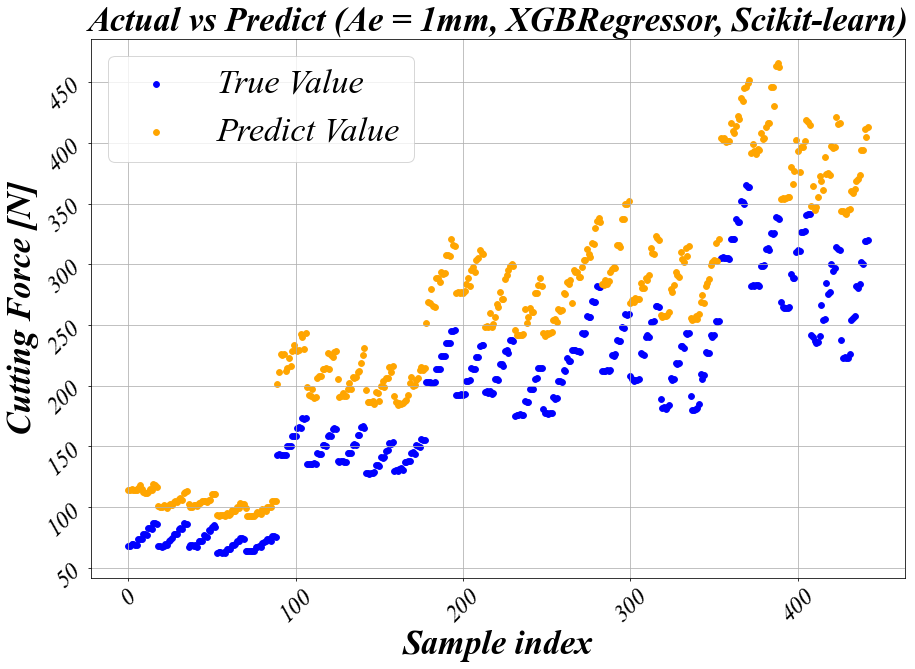

In [82]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

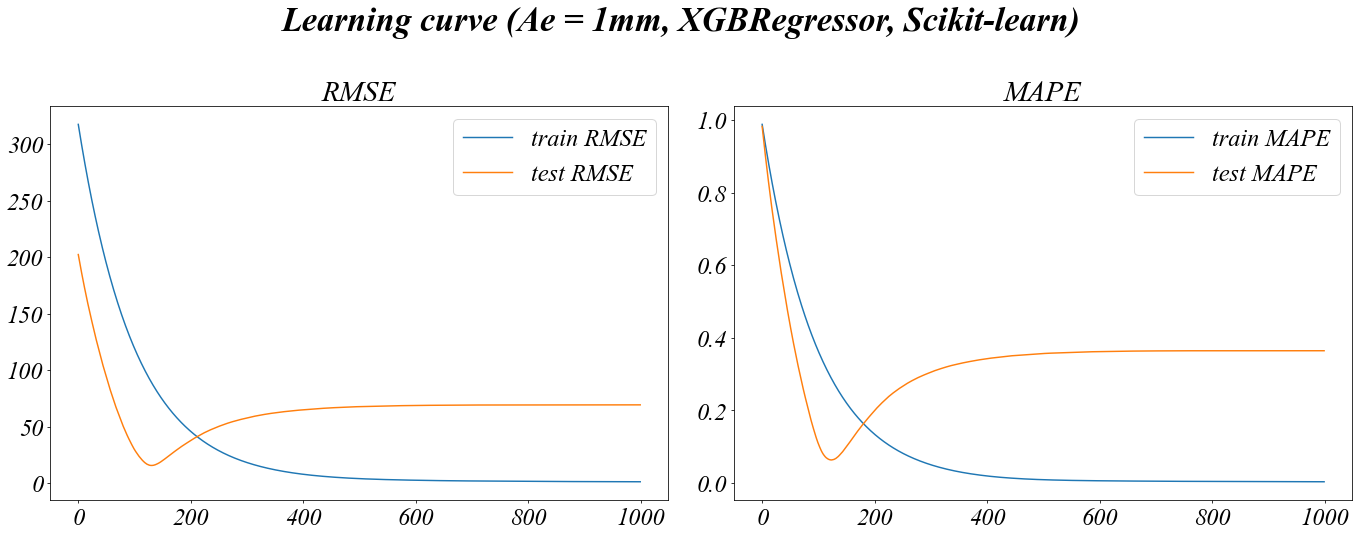

In [83]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()

# ***Ae 2 test***

In [84]:
train = pd.concat([ae_1, ae_3, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [85]:
X_test = ae_2.iloc[: , 1:]
y_test = ae_2['RMS_CF_max']

In [86]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [87]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:297.64222	validation_0-mape:0.98755	validation_1-rmse:280.02624	validation_1-mape:0.98740
[1]	validation_0-rmse:294.72852	validation_0-mape:0.97770	validation_1-rmse:277.21020	validation_1-mape:0.97733
[2]	validation_0-rmse:291.84398	validation_0-mape:0.96795	validation_1-rmse:274.41966	validation_1-mape:0.96735
[3]	validation_0-rmse:288.98831	validation_0-mape:0.95829	validation_1-rmse:271.65278	validation_1-mape:0.95746
[4]	validation_0-rmse:286.16321	validation_0-mape:0.94870	validation_1-rmse:268.84652	validation_1-mape:0.94742
[5]	validation_0-rmse:283.36429	validation_0-mape:0.93923	validation_1-rmse:266.14204	validation_1-mape:0.93774
[6]	validation_0-rmse:280.59542	validation_0-mape:0.92985	validation_1-rmse:263.39128	validation_1-mape:0.92788
[7]	validation_0-rmse:277.85200	validation_0-mape:0.92059	validation_1-rmse:260.72459	validation_1-mape:0.91837
[8]	validation_0-rmse:275.13653	validation_0-mape:0.91142	validation_1-rmse:258.04605	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[37]	validation_0-rmse:207.03139	validation_0-mape:0.68146	validation_1-rmse:191.81787	validation_1-mape:0.66924
[38]	validation_0-rmse:205.01616	validation_0-mape:0.67464	validation_1-rmse:189.87613	validation_1-mape:0.66223
[39]	validation_0-rmse:203.02424	validation_0-mape:0.66794	validation_1-rmse:187.96831	validation_1-mape:0.65550
[40]	validation_0-rmse:201.04816	validation_0-mape:0.66125	validation_1-rmse:186.04149	validation_1-mape:0.64847
[41]	validation_0-rmse:199.09113	validation_0-mape:0.65465	validation_1-rmse:184.14137	validation_1-mape:0.64151
[42]	validation_0-rmse:197.15576	validation_0-mape:0.64811	validation_1-rmse:182.31101	validation_1-mape:0.63481
[43]	validation_0-rmse:195.23873	validation_0-mape:0.64163	validation_1-rmse:180.47450	validation_1-mape:0.62816
[44]	validation_0-rmse:193.34331	validation_0-mape:0.63525	validation_1-rmse:178.64179	validation_1-mape:0.62167
[45]	validation_0-rmse:191.46267	validation_0-mape:0.62891	validation_1-rmse:176.80393	validatio

[110]	validation_0-rmse:101.96501	validation_0-mape:0.32814	validation_1-rmse:93.16521	validation_1-mape:0.30512
[111]	validation_0-rmse:100.98882	validation_0-mape:0.32488	validation_1-rmse:92.24381	validation_1-mape:0.30167
[112]	validation_0-rmse:100.02095	validation_0-mape:0.32167	validation_1-rmse:91.28448	validation_1-mape:0.29806
[113]	validation_0-rmse:99.06276	validation_0-mape:0.31849	validation_1-rmse:90.32880	validation_1-mape:0.29449
[114]	validation_0-rmse:98.11564	validation_0-mape:0.31533	validation_1-rmse:89.52504	validation_1-mape:0.29134
[115]	validation_0-rmse:97.17756	validation_0-mape:0.31220	validation_1-rmse:88.64773	validation_1-mape:0.28802
[116]	validation_0-rmse:96.24891	validation_0-mape:0.30910	validation_1-rmse:87.81565	validation_1-mape:0.28483
[117]	validation_0-rmse:95.32920	validation_0-mape:0.30603	validation_1-rmse:86.94377	validation_1-mape:0.28155
[118]	validation_0-rmse:94.41892	validation_0-mape:0.30299	validation_1-rmse:86.12642	validation_1-ma

[184]	validation_0-rmse:50.47026	validation_0-mape:0.15713	validation_1-rmse:47.98279	validation_1-mape:0.12688
[185]	validation_0-rmse:49.99928	validation_0-mape:0.15558	validation_1-rmse:47.60515	validation_1-mape:0.12531
[186]	validation_0-rmse:49.53292	validation_0-mape:0.15404	validation_1-rmse:47.23045	validation_1-mape:0.12372
[187]	validation_0-rmse:49.07064	validation_0-mape:0.15252	validation_1-rmse:46.88188	validation_1-mape:0.12224
[188]	validation_0-rmse:48.61485	validation_0-mape:0.15101	validation_1-rmse:46.52152	validation_1-mape:0.12079
[189]	validation_0-rmse:48.16481	validation_0-mape:0.14951	validation_1-rmse:46.18047	validation_1-mape:0.11938
[190]	validation_0-rmse:47.71743	validation_0-mape:0.14803	validation_1-rmse:45.83227	validation_1-mape:0.11796
[191]	validation_0-rmse:47.27318	validation_0-mape:0.14657	validation_1-rmse:45.47838	validation_1-mape:0.11653
[192]	validation_0-rmse:46.83493	validation_0-mape:0.14511	validation_1-rmse:45.14616	validation_1-mape:

[258]	validation_0-rmse:25.64271	validation_0-mape:0.07539	validation_1-rmse:31.69834	validation_1-mape:0.07582
[259]	validation_0-rmse:25.41565	validation_0-mape:0.07465	validation_1-rmse:31.60128	validation_1-mape:0.07575
[260]	validation_0-rmse:25.19019	validation_0-mape:0.07392	validation_1-rmse:31.49376	validation_1-mape:0.07565
[261]	validation_0-rmse:24.96724	validation_0-mape:0.07319	validation_1-rmse:31.39424	validation_1-mape:0.07558
[262]	validation_0-rmse:24.74657	validation_0-mape:0.07247	validation_1-rmse:31.28953	validation_1-mape:0.07550
[263]	validation_0-rmse:24.52763	validation_0-mape:0.07176	validation_1-rmse:31.18536	validation_1-mape:0.07541
[264]	validation_0-rmse:24.31023	validation_0-mape:0.07106	validation_1-rmse:31.09199	validation_1-mape:0.07535
[265]	validation_0-rmse:24.09608	validation_0-mape:0.07036	validation_1-rmse:31.00117	validation_1-mape:0.07532
[266]	validation_0-rmse:23.88392	validation_0-mape:0.06967	validation_1-rmse:30.90733	validation_1-mape:

[332]	validation_0-rmse:13.62244	validation_0-mape:0.03691	validation_1-rmse:27.55177	validation_1-mape:0.07642
[333]	validation_0-rmse:13.51330	validation_0-mape:0.03657	validation_1-rmse:27.52743	validation_1-mape:0.07644
[334]	validation_0-rmse:13.40376	validation_0-mape:0.03623	validation_1-rmse:27.50505	validation_1-mape:0.07649
[335]	validation_0-rmse:13.29677	validation_0-mape:0.03589	validation_1-rmse:27.48225	validation_1-mape:0.07652
[336]	validation_0-rmse:13.18953	validation_0-mape:0.03555	validation_1-rmse:27.45829	validation_1-mape:0.07658
[337]	validation_0-rmse:13.08325	validation_0-mape:0.03523	validation_1-rmse:27.43403	validation_1-mape:0.07662
[338]	validation_0-rmse:12.97971	validation_0-mape:0.03490	validation_1-rmse:27.41100	validation_1-mape:0.07665
[339]	validation_0-rmse:12.87515	validation_0-mape:0.03458	validation_1-rmse:27.39736	validation_1-mape:0.07670
[340]	validation_0-rmse:12.77225	validation_0-mape:0.03426	validation_1-rmse:27.37587	validation_1-mape:

[406]	validation_0-rmse:7.77994	validation_0-mape:0.01911	validation_1-rmse:26.57267	validation_1-mape:0.07926
[407]	validation_0-rmse:7.72592	validation_0-mape:0.01895	validation_1-rmse:26.57459	validation_1-mape:0.07931
[408]	validation_0-rmse:7.67395	validation_0-mape:0.01881	validation_1-rmse:26.57842	validation_1-mape:0.07936
[409]	validation_0-rmse:7.62307	validation_0-mape:0.01866	validation_1-rmse:26.57975	validation_1-mape:0.07942
[410]	validation_0-rmse:7.57131	validation_0-mape:0.01851	validation_1-rmse:26.58470	validation_1-mape:0.07947
[411]	validation_0-rmse:7.51874	validation_0-mape:0.01836	validation_1-rmse:26.58624	validation_1-mape:0.07953
[412]	validation_0-rmse:7.46731	validation_0-mape:0.01821	validation_1-rmse:26.58884	validation_1-mape:0.07958
[413]	validation_0-rmse:7.41797	validation_0-mape:0.01808	validation_1-rmse:26.59251	validation_1-mape:0.07962
[414]	validation_0-rmse:7.36946	validation_0-mape:0.01794	validation_1-rmse:26.59531	validation_1-mape:0.07967
[

[480]	validation_0-rmse:4.97699	validation_0-mape:0.01195	validation_1-rmse:26.73885	validation_1-mape:0.08204
[481]	validation_0-rmse:4.94892	validation_0-mape:0.01189	validation_1-rmse:26.73757	validation_1-mape:0.08206
[482]	validation_0-rmse:4.92440	validation_0-mape:0.01183	validation_1-rmse:26.73804	validation_1-mape:0.08208
[483]	validation_0-rmse:4.89931	validation_0-mape:0.01178	validation_1-rmse:26.74391	validation_1-mape:0.08211
[484]	validation_0-rmse:4.87505	validation_0-mape:0.01173	validation_1-rmse:26.74832	validation_1-mape:0.08214
[485]	validation_0-rmse:4.85023	validation_0-mape:0.01167	validation_1-rmse:26.74876	validation_1-mape:0.08217
[486]	validation_0-rmse:4.82580	validation_0-mape:0.01162	validation_1-rmse:26.75249	validation_1-mape:0.08220
[487]	validation_0-rmse:4.80078	validation_0-mape:0.01157	validation_1-rmse:26.75329	validation_1-mape:0.08222
[488]	validation_0-rmse:4.77763	validation_0-mape:0.01152	validation_1-rmse:26.75666	validation_1-mape:0.08225
[

[554]	validation_0-rmse:3.61159	validation_0-mape:0.00921	validation_1-rmse:26.85464	validation_1-mape:0.08363
[555]	validation_0-rmse:3.59762	validation_0-mape:0.00918	validation_1-rmse:26.85793	validation_1-mape:0.08365
[556]	validation_0-rmse:3.58609	validation_0-mape:0.00916	validation_1-rmse:26.85948	validation_1-mape:0.08366
[557]	validation_0-rmse:3.57536	validation_0-mape:0.00914	validation_1-rmse:26.86128	validation_1-mape:0.08368
[558]	validation_0-rmse:3.56112	validation_0-mape:0.00912	validation_1-rmse:26.86004	validation_1-mape:0.08370
[559]	validation_0-rmse:3.54806	validation_0-mape:0.00910	validation_1-rmse:26.85920	validation_1-mape:0.08371
[560]	validation_0-rmse:3.53619	validation_0-mape:0.00907	validation_1-rmse:26.86014	validation_1-mape:0.08372
[561]	validation_0-rmse:3.52303	validation_0-mape:0.00905	validation_1-rmse:26.86248	validation_1-mape:0.08373
[562]	validation_0-rmse:3.51131	validation_0-mape:0.00902	validation_1-rmse:26.86392	validation_1-mape:0.08375
[

[628]	validation_0-rmse:2.89325	validation_0-mape:0.00789	validation_1-rmse:26.91740	validation_1-mape:0.08442
[629]	validation_0-rmse:2.88644	validation_0-mape:0.00787	validation_1-rmse:26.91854	validation_1-mape:0.08442
[630]	validation_0-rmse:2.87732	validation_0-mape:0.00785	validation_1-rmse:26.91520	validation_1-mape:0.08442
[631]	validation_0-rmse:2.87276	validation_0-mape:0.00785	validation_1-rmse:26.91695	validation_1-mape:0.08443
[632]	validation_0-rmse:2.86295	validation_0-mape:0.00783	validation_1-rmse:26.91161	validation_1-mape:0.08443
[633]	validation_0-rmse:2.85691	validation_0-mape:0.00781	validation_1-rmse:26.91367	validation_1-mape:0.08444
[634]	validation_0-rmse:2.85097	validation_0-mape:0.00780	validation_1-rmse:26.91204	validation_1-mape:0.08445
[635]	validation_0-rmse:2.84558	validation_0-mape:0.00779	validation_1-rmse:26.91180	validation_1-mape:0.08446
[636]	validation_0-rmse:2.83975	validation_0-mape:0.00778	validation_1-rmse:26.91018	validation_1-mape:0.08448
[

[702]	validation_0-rmse:2.44690	validation_0-mape:0.00700	validation_1-rmse:26.93171	validation_1-mape:0.08485
[703]	validation_0-rmse:2.44246	validation_0-mape:0.00699	validation_1-rmse:26.93023	validation_1-mape:0.08485
[704]	validation_0-rmse:2.43720	validation_0-mape:0.00698	validation_1-rmse:26.93098	validation_1-mape:0.08485
[705]	validation_0-rmse:2.43298	validation_0-mape:0.00697	validation_1-rmse:26.93176	validation_1-mape:0.08486
[706]	validation_0-rmse:2.42634	validation_0-mape:0.00696	validation_1-rmse:26.93122	validation_1-mape:0.08485
[707]	validation_0-rmse:2.42174	validation_0-mape:0.00695	validation_1-rmse:26.93249	validation_1-mape:0.08486
[708]	validation_0-rmse:2.41724	validation_0-mape:0.00694	validation_1-rmse:26.93312	validation_1-mape:0.08486
[709]	validation_0-rmse:2.41201	validation_0-mape:0.00692	validation_1-rmse:26.93285	validation_1-mape:0.08487
[710]	validation_0-rmse:2.40652	validation_0-mape:0.00691	validation_1-rmse:26.93305	validation_1-mape:0.08487
[

[776]	validation_0-rmse:2.13443	validation_0-mape:0.00630	validation_1-rmse:26.92681	validation_1-mape:0.08499
[777]	validation_0-rmse:2.13266	validation_0-mape:0.00630	validation_1-rmse:26.92751	validation_1-mape:0.08499
[778]	validation_0-rmse:2.12948	validation_0-mape:0.00628	validation_1-rmse:26.92725	validation_1-mape:0.08499
[779]	validation_0-rmse:2.12488	validation_0-mape:0.00627	validation_1-rmse:26.92705	validation_1-mape:0.08499
[780]	validation_0-rmse:2.12287	validation_0-mape:0.00627	validation_1-rmse:26.92781	validation_1-mape:0.08499
[781]	validation_0-rmse:2.12112	validation_0-mape:0.00627	validation_1-rmse:26.92910	validation_1-mape:0.08499
[782]	validation_0-rmse:2.11939	validation_0-mape:0.00626	validation_1-rmse:26.92971	validation_1-mape:0.08499
[783]	validation_0-rmse:2.11744	validation_0-mape:0.00626	validation_1-rmse:26.93045	validation_1-mape:0.08499
[784]	validation_0-rmse:2.11512	validation_0-mape:0.00625	validation_1-rmse:26.93148	validation_1-mape:0.08500
[

[850]	validation_0-rmse:1.93329	validation_0-mape:0.00582	validation_1-rmse:26.96145	validation_1-mape:0.08514
[851]	validation_0-rmse:1.93117	validation_0-mape:0.00581	validation_1-rmse:26.96082	validation_1-mape:0.08514
[852]	validation_0-rmse:1.92971	validation_0-mape:0.00581	validation_1-rmse:26.96135	validation_1-mape:0.08515
[853]	validation_0-rmse:1.92778	validation_0-mape:0.00580	validation_1-rmse:26.96093	validation_1-mape:0.08515
[854]	validation_0-rmse:1.92690	validation_0-mape:0.00580	validation_1-rmse:26.96151	validation_1-mape:0.08515
[855]	validation_0-rmse:1.92547	validation_0-mape:0.00580	validation_1-rmse:26.96183	validation_1-mape:0.08515
[856]	validation_0-rmse:1.92248	validation_0-mape:0.00579	validation_1-rmse:26.96286	validation_1-mape:0.08516
[857]	validation_0-rmse:1.91958	validation_0-mape:0.00578	validation_1-rmse:26.96344	validation_1-mape:0.08516
[858]	validation_0-rmse:1.91804	validation_0-mape:0.00578	validation_1-rmse:26.96341	validation_1-mape:0.08516
[

[924]	validation_0-rmse:1.82049	validation_0-mape:0.00553	validation_1-rmse:26.96156	validation_1-mape:0.08520
[925]	validation_0-rmse:1.81915	validation_0-mape:0.00553	validation_1-rmse:26.96196	validation_1-mape:0.08520
[926]	validation_0-rmse:1.81761	validation_0-mape:0.00553	validation_1-rmse:26.96185	validation_1-mape:0.08521
[927]	validation_0-rmse:1.81499	validation_0-mape:0.00552	validation_1-rmse:26.96243	validation_1-mape:0.08521
[928]	validation_0-rmse:1.81338	validation_0-mape:0.00551	validation_1-rmse:26.96260	validation_1-mape:0.08521
[929]	validation_0-rmse:1.81128	validation_0-mape:0.00551	validation_1-rmse:26.96249	validation_1-mape:0.08521
[930]	validation_0-rmse:1.80981	validation_0-mape:0.00551	validation_1-rmse:26.96254	validation_1-mape:0.08521
[931]	validation_0-rmse:1.80822	validation_0-mape:0.00550	validation_1-rmse:26.96219	validation_1-mape:0.08521
[932]	validation_0-rmse:1.80721	validation_0-mape:0.00550	validation_1-rmse:26.96178	validation_1-mape:0.08521
[

[998]	validation_0-rmse:1.71588	validation_0-mape:0.00523	validation_1-rmse:26.96882	validation_1-mape:0.08529
[999]	validation_0-rmse:1.71516	validation_0-mape:0.00523	validation_1-rmse:26.96873	validation_1-mape:0.08529


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [88]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7152
Train MAPE: 0.5231
Test RMSE: 26.9687
Test MAPE: 8.5289


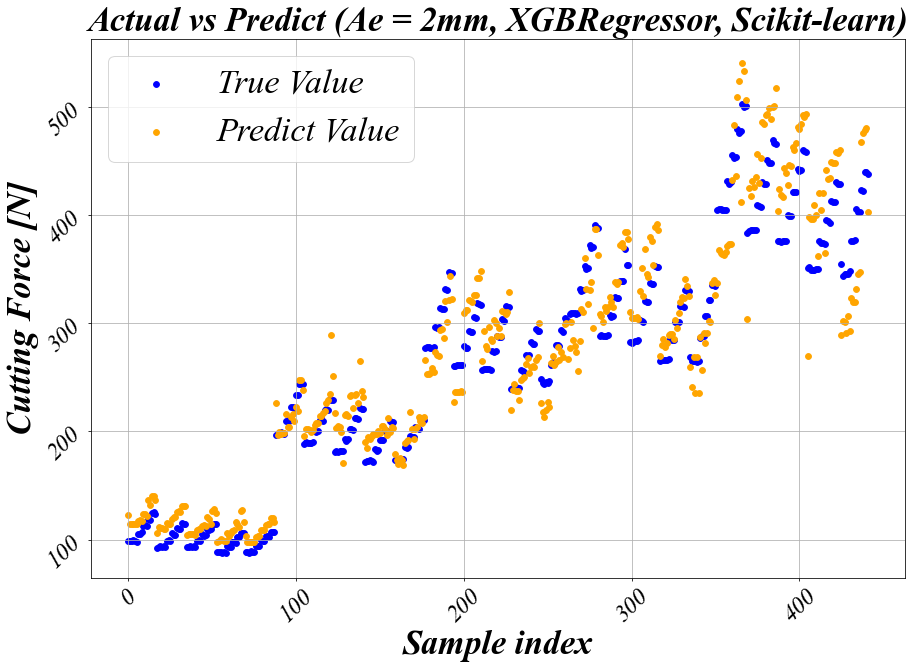

In [89]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 2mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

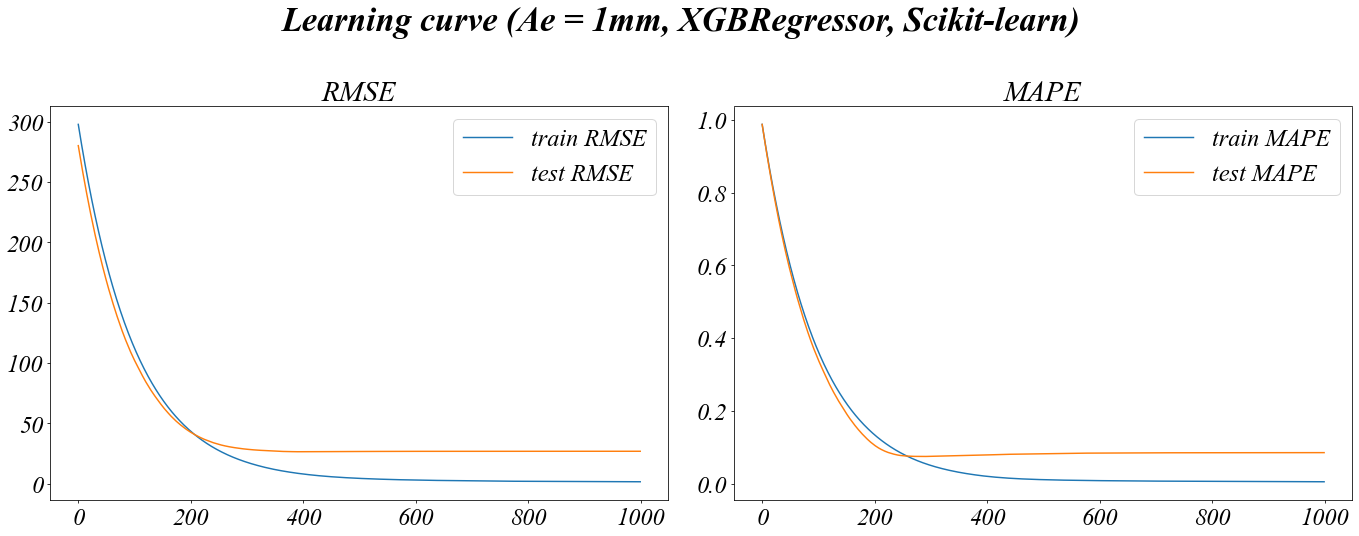

In [90]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()

# ***Ae 3 test***

In [91]:
train = pd.concat([ae_1, ae_2, ae_4], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [92]:
X_test = ae_3.iloc[: , 1:]
y_test = ae_3['RMS_CF_max']

In [93]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [94]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:283.37678	validation_0-mape:0.98744	validation_1-rmse:321.76338	validation_1-mape:0.98839
[1]	validation_0-rmse:280.61208	validation_0-mape:0.97758	validation_1-rmse:318.73519	validation_1-mape:0.97898
[2]	validation_0-rmse:277.87496	validation_0-mape:0.96781	validation_1-rmse:315.74747	validation_1-mape:0.96968
[3]	validation_0-rmse:275.16515	validation_0-mape:0.95815	validation_1-rmse:312.77920	validation_1-mape:0.96047
[4]	validation_0-rmse:272.48239	validation_0-mape:0.94859	validation_1-rmse:309.85103	validation_1-mape:0.95137
[5]	validation_0-rmse:269.82609	validation_0-mape:0.93913	validation_1-rmse:306.94423	validation_1-mape:0.94232
[6]	validation_0-rmse:267.19197	validation_0-mape:0.92972	validation_1-rmse:304.04003	validation_1-mape:0.93329
[7]	validation_0-rmse:264.58757	validation_0-mape:0.92046	validation_1-rmse:301.08455	validation_1-mape:0.92425
[8]	validation_0-rmse:262.00939	validation_0-mape:0.91128	validation_1-rmse:298.16579	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[33]	validation_0-rmse:205.22412	validation_0-mape:0.70892	validation_1-rmse:234.42473	validation_1-mape:0.71804
[34]	validation_0-rmse:203.23513	validation_0-mape:0.70185	validation_1-rmse:232.18109	validation_1-mape:0.71099
[35]	validation_0-rmse:201.26510	validation_0-mape:0.69485	validation_1-rmse:229.93407	validation_1-mape:0.70412
[36]	validation_0-rmse:199.31310	validation_0-mape:0.68789	validation_1-rmse:227.71016	validation_1-mape:0.69729
[37]	validation_0-rmse:197.38346	validation_0-mape:0.68101	validation_1-rmse:225.48029	validation_1-mape:0.69036
[38]	validation_0-rmse:195.47285	validation_0-mape:0.67420	validation_1-rmse:223.27072	validation_1-mape:0.68360
[39]	validation_0-rmse:193.57833	validation_0-mape:0.66746	validation_1-rmse:221.10726	validation_1-mape:0.67688
[40]	validation_0-rmse:191.70081	validation_0-mape:0.66078	validation_1-rmse:219.02241	validation_1-mape:0.67040
[41]	validation_0-rmse:189.84523	validation_0-mape:0.65419	validation_1-rmse:216.95259	validatio

[106]	validation_0-rmse:101.34516	validation_0-mape:0.34124	validation_1-rmse:116.55463	validation_1-mape:0.35348
[107]	validation_0-rmse:100.37904	validation_0-mape:0.33786	validation_1-rmse:115.45990	validation_1-mape:0.35006
[108]	validation_0-rmse:99.42432	validation_0-mape:0.33449	validation_1-rmse:114.39121	validation_1-mape:0.34677
[109]	validation_0-rmse:98.47376	validation_0-mape:0.33117	validation_1-rmse:113.32767	validation_1-mape:0.34342
[110]	validation_0-rmse:97.53856	validation_0-mape:0.32788	validation_1-rmse:112.28360	validation_1-mape:0.34018
[111]	validation_0-rmse:96.60995	validation_0-mape:0.32462	validation_1-rmse:111.24036	validation_1-mape:0.33691
[112]	validation_0-rmse:95.69282	validation_0-mape:0.32139	validation_1-rmse:110.22140	validation_1-mape:0.33372
[113]	validation_0-rmse:94.78251	validation_0-mape:0.31819	validation_1-rmse:109.19899	validation_1-mape:0.33052
[114]	validation_0-rmse:93.88148	validation_0-mape:0.31502	validation_1-rmse:108.19702	validat

[179]	validation_0-rmse:50.78572	validation_0-mape:0.16485	validation_1-rmse:60.19190	validation_1-mape:0.17671
[180]	validation_0-rmse:50.30630	validation_0-mape:0.16323	validation_1-rmse:59.60378	validation_1-mape:0.17491
[181]	validation_0-rmse:49.83173	validation_0-mape:0.16163	validation_1-rmse:59.02306	validation_1-mape:0.17316
[182]	validation_0-rmse:49.36191	validation_0-mape:0.16004	validation_1-rmse:58.44654	validation_1-mape:0.17139
[183]	validation_0-rmse:48.89684	validation_0-mape:0.15847	validation_1-rmse:57.87755	validation_1-mape:0.16968
[184]	validation_0-rmse:48.43645	validation_0-mape:0.15691	validation_1-rmse:57.31350	validation_1-mape:0.16795
[185]	validation_0-rmse:47.98070	validation_0-mape:0.15537	validation_1-rmse:56.75313	validation_1-mape:0.16627
[186]	validation_0-rmse:47.52951	validation_0-mape:0.15384	validation_1-rmse:56.19908	validation_1-mape:0.16456
[187]	validation_0-rmse:47.08186	validation_0-mape:0.15233	validation_1-rmse:55.65028	validation_1-mape:

[253]	validation_0-rmse:25.63208	validation_0-mape:0.07939	validation_1-rmse:30.20599	validation_1-mape:0.08498
[254]	validation_0-rmse:25.40310	validation_0-mape:0.07861	validation_1-rmse:29.93579	validation_1-mape:0.08417
[255]	validation_0-rmse:25.17853	validation_0-mape:0.07783	validation_1-rmse:29.71460	validation_1-mape:0.08347
[256]	validation_0-rmse:24.95446	validation_0-mape:0.07707	validation_1-rmse:29.46353	validation_1-mape:0.08273
[257]	validation_0-rmse:24.73283	validation_0-mape:0.07631	validation_1-rmse:29.24892	validation_1-mape:0.08206
[258]	validation_0-rmse:24.51373	validation_0-mape:0.07556	validation_1-rmse:28.99316	validation_1-mape:0.08130
[259]	validation_0-rmse:24.29735	validation_0-mape:0.07482	validation_1-rmse:28.77191	validation_1-mape:0.08061
[260]	validation_0-rmse:24.08036	validation_0-mape:0.07409	validation_1-rmse:28.52525	validation_1-mape:0.07986
[261]	validation_0-rmse:23.86711	validation_0-mape:0.07336	validation_1-rmse:28.27345	validation_1-mape:

[327]	validation_0-rmse:13.55880	validation_0-mape:0.03849	validation_1-rmse:18.51246	validation_1-mape:0.05035
[328]	validation_0-rmse:13.44994	validation_0-mape:0.03812	validation_1-rmse:18.43051	validation_1-mape:0.05011
[329]	validation_0-rmse:13.34007	validation_0-mape:0.03776	validation_1-rmse:18.33079	validation_1-mape:0.04983
[330]	validation_0-rmse:13.23268	validation_0-mape:0.03740	validation_1-rmse:18.24924	validation_1-mape:0.04959
[331]	validation_0-rmse:13.12691	validation_0-mape:0.03705	validation_1-rmse:18.16837	validation_1-mape:0.04936
[332]	validation_0-rmse:13.02020	validation_0-mape:0.03670	validation_1-rmse:18.07520	validation_1-mape:0.04910
[333]	validation_0-rmse:12.91602	validation_0-mape:0.03635	validation_1-rmse:17.99779	validation_1-mape:0.04888
[334]	validation_0-rmse:12.81341	validation_0-mape:0.03601	validation_1-rmse:17.92299	validation_1-mape:0.04866
[335]	validation_0-rmse:12.70990	validation_0-mape:0.03567	validation_1-rmse:17.83683	validation_1-mape:

[401]	validation_0-rmse:7.83310	validation_0-mape:0.02013	validation_1-rmse:14.98742	validation_1-mape:0.04014
[402]	validation_0-rmse:7.78258	validation_0-mape:0.01997	validation_1-rmse:14.96962	validation_1-mape:0.04009
[403]	validation_0-rmse:7.72988	validation_0-mape:0.01981	validation_1-rmse:14.94671	validation_1-mape:0.04002
[404]	validation_0-rmse:7.67971	validation_0-mape:0.01965	validation_1-rmse:14.92370	validation_1-mape:0.03995
[405]	validation_0-rmse:7.63060	validation_0-mape:0.01951	validation_1-rmse:14.90404	validation_1-mape:0.03990
[406]	validation_0-rmse:7.58143	validation_0-mape:0.01936	validation_1-rmse:14.88977	validation_1-mape:0.03984
[407]	validation_0-rmse:7.53284	validation_0-mape:0.01922	validation_1-rmse:14.87167	validation_1-mape:0.03978
[408]	validation_0-rmse:7.48534	validation_0-mape:0.01908	validation_1-rmse:14.85706	validation_1-mape:0.03973
[409]	validation_0-rmse:7.43556	validation_0-mape:0.01893	validation_1-rmse:14.83692	validation_1-mape:0.03967
[

[475]	validation_0-rmse:5.10173	validation_0-mape:0.01273	validation_1-rmse:14.11480	validation_1-mape:0.03720
[476]	validation_0-rmse:5.07530	validation_0-mape:0.01267	validation_1-rmse:14.10986	validation_1-mape:0.03718
[477]	validation_0-rmse:5.04832	validation_0-mape:0.01262	validation_1-rmse:14.10635	validation_1-mape:0.03717
[478]	validation_0-rmse:5.02563	validation_0-mape:0.01256	validation_1-rmse:14.09833	validation_1-mape:0.03714
[479]	validation_0-rmse:4.99940	validation_0-mape:0.01250	validation_1-rmse:14.09299	validation_1-mape:0.03712
[480]	validation_0-rmse:4.97425	validation_0-mape:0.01245	validation_1-rmse:14.08678	validation_1-mape:0.03710
[481]	validation_0-rmse:4.95289	validation_0-mape:0.01239	validation_1-rmse:14.08021	validation_1-mape:0.03708
[482]	validation_0-rmse:4.92827	validation_0-mape:0.01234	validation_1-rmse:14.07414	validation_1-mape:0.03706
[483]	validation_0-rmse:4.90419	validation_0-mape:0.01229	validation_1-rmse:14.06906	validation_1-mape:0.03705
[

[549]	validation_0-rmse:3.76168	validation_0-mape:0.00999	validation_1-rmse:13.92065	validation_1-mape:0.03611
[550]	validation_0-rmse:3.74919	validation_0-mape:0.00997	validation_1-rmse:13.92076	validation_1-mape:0.03610
[551]	validation_0-rmse:3.73544	validation_0-mape:0.00994	validation_1-rmse:13.91963	validation_1-mape:0.03609
[552]	validation_0-rmse:3.72397	validation_0-mape:0.00992	validation_1-rmse:13.91917	validation_1-mape:0.03609
[553]	validation_0-rmse:3.71184	validation_0-mape:0.00990	validation_1-rmse:13.91936	validation_1-mape:0.03608
[554]	validation_0-rmse:3.69979	validation_0-mape:0.00987	validation_1-rmse:13.91987	validation_1-mape:0.03607
[555]	validation_0-rmse:3.68656	validation_0-mape:0.00985	validation_1-rmse:13.91880	validation_1-mape:0.03606
[556]	validation_0-rmse:3.67486	validation_0-mape:0.00983	validation_1-rmse:13.91907	validation_1-mape:0.03606
[557]	validation_0-rmse:3.66165	validation_0-mape:0.00980	validation_1-rmse:13.91963	validation_1-mape:0.03605
[

[623]	validation_0-rmse:3.03710	validation_0-mape:0.00866	validation_1-rmse:13.94766	validation_1-mape:0.03570
[624]	validation_0-rmse:3.02821	validation_0-mape:0.00864	validation_1-rmse:13.95127	validation_1-mape:0.03570
[625]	validation_0-rmse:3.01927	validation_0-mape:0.00862	validation_1-rmse:13.95132	validation_1-mape:0.03570
[626]	validation_0-rmse:3.01394	validation_0-mape:0.00861	validation_1-rmse:13.95287	validation_1-mape:0.03570
[627]	validation_0-rmse:3.00575	validation_0-mape:0.00860	validation_1-rmse:13.95250	validation_1-mape:0.03570
[628]	validation_0-rmse:2.99928	validation_0-mape:0.00859	validation_1-rmse:13.95518	validation_1-mape:0.03570
[629]	validation_0-rmse:2.99413	validation_0-mape:0.00858	validation_1-rmse:13.95602	validation_1-mape:0.03570
[630]	validation_0-rmse:2.98611	validation_0-mape:0.00856	validation_1-rmse:13.95581	validation_1-mape:0.03570
[631]	validation_0-rmse:2.97847	validation_0-mape:0.00855	validation_1-rmse:13.95608	validation_1-mape:0.03569
[

[697]	validation_0-rmse:2.62697	validation_0-mape:0.00788	validation_1-rmse:14.05412	validation_1-mape:0.03567
[698]	validation_0-rmse:2.62143	validation_0-mape:0.00786	validation_1-rmse:14.05510	validation_1-mape:0.03567
[699]	validation_0-rmse:2.61778	validation_0-mape:0.00785	validation_1-rmse:14.05622	validation_1-mape:0.03567
[700]	validation_0-rmse:2.61219	validation_0-mape:0.00784	validation_1-rmse:14.05906	validation_1-mape:0.03567
[701]	validation_0-rmse:2.60893	validation_0-mape:0.00783	validation_1-rmse:14.05837	validation_1-mape:0.03567
[702]	validation_0-rmse:2.60583	validation_0-mape:0.00782	validation_1-rmse:14.05885	validation_1-mape:0.03567
[703]	validation_0-rmse:2.59980	validation_0-mape:0.00781	validation_1-rmse:14.06133	validation_1-mape:0.03568
[704]	validation_0-rmse:2.59662	validation_0-mape:0.00780	validation_1-rmse:14.06064	validation_1-mape:0.03568
[705]	validation_0-rmse:2.59245	validation_0-mape:0.00779	validation_1-rmse:14.06081	validation_1-mape:0.03568
[

[771]	validation_0-rmse:2.35114	validation_0-mape:0.00718	validation_1-rmse:14.03056	validation_1-mape:0.03553
[772]	validation_0-rmse:2.34876	validation_0-mape:0.00717	validation_1-rmse:14.02974	validation_1-mape:0.03553
[773]	validation_0-rmse:2.34617	validation_0-mape:0.00717	validation_1-rmse:14.02765	validation_1-mape:0.03552
[774]	validation_0-rmse:2.34415	validation_0-mape:0.00716	validation_1-rmse:14.02769	validation_1-mape:0.03552
[775]	validation_0-rmse:2.34020	validation_0-mape:0.00715	validation_1-rmse:14.02759	validation_1-mape:0.03552
[776]	validation_0-rmse:2.33777	validation_0-mape:0.00714	validation_1-rmse:14.02643	validation_1-mape:0.03552
[777]	validation_0-rmse:2.33424	validation_0-mape:0.00714	validation_1-rmse:14.02630	validation_1-mape:0.03552
[778]	validation_0-rmse:2.33005	validation_0-mape:0.00712	validation_1-rmse:14.02638	validation_1-mape:0.03552
[779]	validation_0-rmse:2.32787	validation_0-mape:0.00712	validation_1-rmse:14.02672	validation_1-mape:0.03552
[

[918]	validation_0-rmse:1.90254	validation_0-mape:0.00600	validation_1-rmse:13.99920	validation_1-mape:0.03553
[919]	validation_0-rmse:1.89967	validation_0-mape:0.00599	validation_1-rmse:13.99847	validation_1-mape:0.03553
[920]	validation_0-rmse:1.89807	validation_0-mape:0.00599	validation_1-rmse:13.99829	validation_1-mape:0.03553
[921]	validation_0-rmse:1.89456	validation_0-mape:0.00598	validation_1-rmse:13.99844	validation_1-mape:0.03553
[922]	validation_0-rmse:1.89178	validation_0-mape:0.00597	validation_1-rmse:13.99793	validation_1-mape:0.03553
[923]	validation_0-rmse:1.89015	validation_0-mape:0.00597	validation_1-rmse:13.99737	validation_1-mape:0.03553
[924]	validation_0-rmse:1.88728	validation_0-mape:0.00596	validation_1-rmse:13.99617	validation_1-mape:0.03553
[925]	validation_0-rmse:1.88620	validation_0-mape:0.00596	validation_1-rmse:13.99658	validation_1-mape:0.03553
[926]	validation_0-rmse:1.88523	validation_0-mape:0.00595	validation_1-rmse:13.99684	validation_1-mape:0.03553
[

[992]	validation_0-rmse:1.75261	validation_0-mape:0.00560	validation_1-rmse:13.97499	validation_1-mape:0.03550
[993]	validation_0-rmse:1.75180	validation_0-mape:0.00560	validation_1-rmse:13.97521	validation_1-mape:0.03550
[994]	validation_0-rmse:1.75003	validation_0-mape:0.00559	validation_1-rmse:13.97491	validation_1-mape:0.03550
[995]	validation_0-rmse:1.74842	validation_0-mape:0.00558	validation_1-rmse:13.97441	validation_1-mape:0.03550
[996]	validation_0-rmse:1.74703	validation_0-mape:0.00558	validation_1-rmse:13.97431	validation_1-mape:0.03550
[997]	validation_0-rmse:1.74571	validation_0-mape:0.00558	validation_1-rmse:13.97414	validation_1-mape:0.03550
[998]	validation_0-rmse:1.74468	validation_0-mape:0.00558	validation_1-rmse:13.97389	validation_1-mape:0.03550
[999]	validation_0-rmse:1.74366	validation_0-mape:0.00557	validation_1-rmse:13.97357	validation_1-mape:0.03550


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [95]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.7437
Train MAPE: 0.5574
Test RMSE: 13.9736
Test MAPE: 3.5503


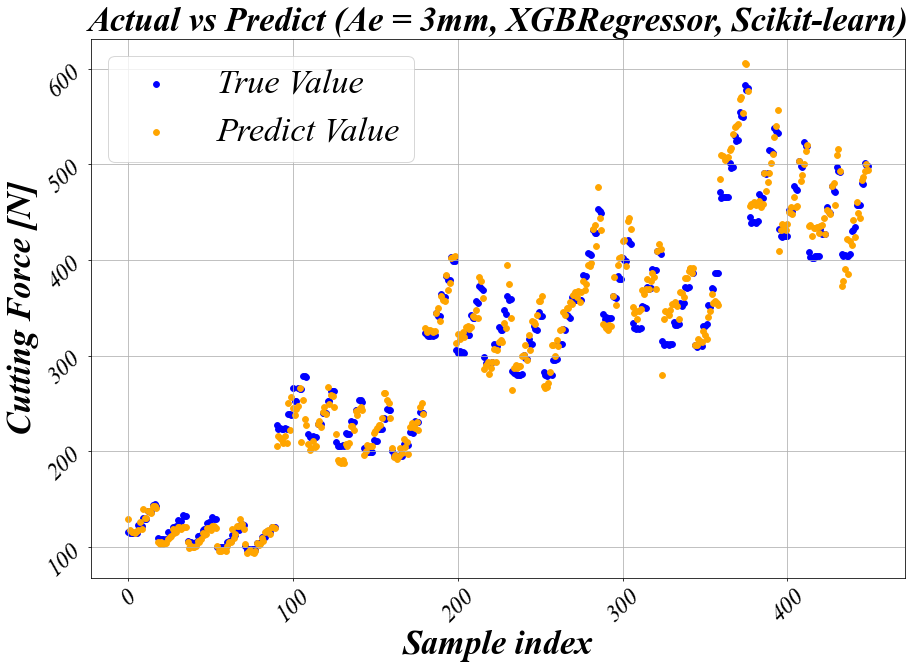

In [96]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 3mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

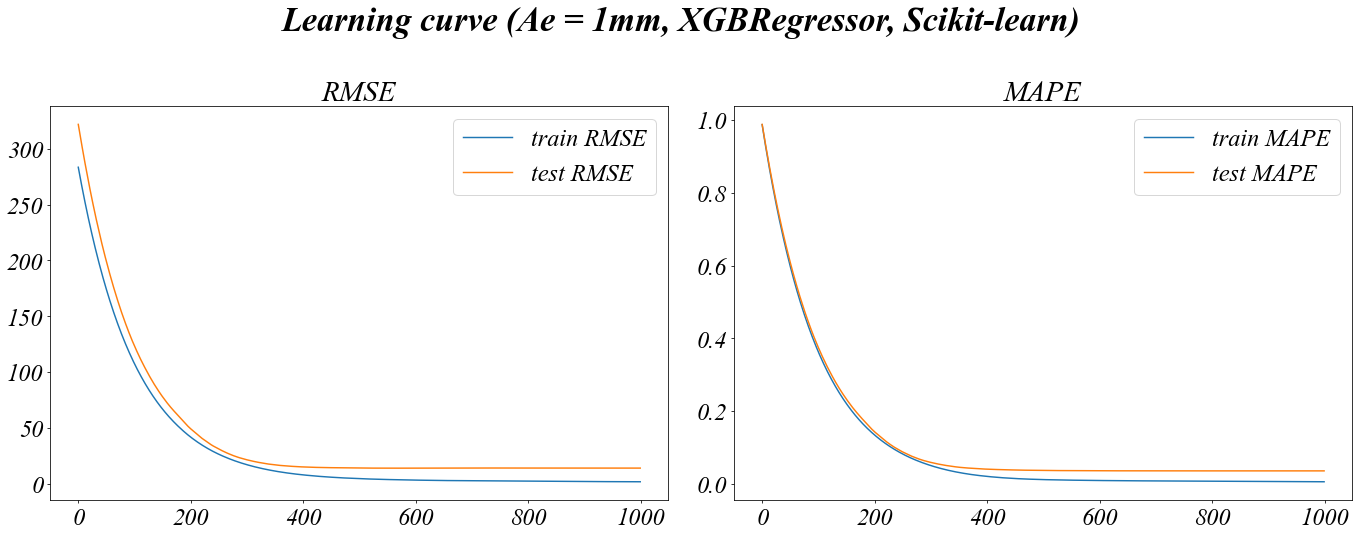

In [97]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()

# ***Ae 4 test***

In [98]:
train = pd.concat([ae_1, ae_2, ae_3], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [99]:
X_test = ae_4.iloc[: , 1:]
y_test = ae_4['RMS_CF_max']

In [100]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [101]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:272.99472	validation_0-mape:0.98741	validation_1-rmse:346.17417	validation_1-mape:0.98890
[1]	validation_0-rmse:270.31975	validation_0-mape:0.97754	validation_1-rmse:343.12401	validation_1-mape:0.97992
[2]	validation_0-rmse:267.67189	validation_0-mape:0.96775	validation_1-rmse:340.10214	validation_1-mape:0.97102
[3]	validation_0-rmse:265.05012	validation_0-mape:0.95809	validation_1-rmse:337.11298	validation_1-mape:0.96225
[4]	validation_0-rmse:262.45472	validation_0-mape:0.94853	validation_1-rmse:334.15154	validation_1-mape:0.95356
[5]	validation_0-rmse:259.88497	validation_0-mape:0.93906	validation_1-rmse:331.22427	validation_1-mape:0.94494
[6]	validation_0-rmse:257.34144	validation_0-mape:0.92967	validation_1-rmse:328.32181	validation_1-mape:0.93641
[7]	validation_0-rmse:254.82282	validation_0-mape:0.92039	validation_1-rmse:325.45287	validation_1-mape:0.92797
[8]	validation_0-rmse:252.32965	validation_0-mape:0.91121	validation_1-rmse:322.61799	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[36]	validation_0-rmse:191.76017	validation_0-mape:0.68781	validation_1-rmse:253.28208	validation_1-mape:0.71514
[37]	validation_0-rmse:189.89152	validation_0-mape:0.68093	validation_1-rmse:251.10014	validation_1-mape:0.70855
[38]	validation_0-rmse:188.04160	validation_0-mape:0.67412	validation_1-rmse:248.94398	validation_1-mape:0.70214
[39]	validation_0-rmse:186.20992	validation_0-mape:0.66738	validation_1-rmse:246.73943	validation_1-mape:0.69557
[40]	validation_0-rmse:184.39936	validation_0-mape:0.66073	validation_1-rmse:244.70226	validation_1-mape:0.68950
[41]	validation_0-rmse:182.60394	validation_0-mape:0.65412	validation_1-rmse:242.60039	validation_1-mape:0.68313
[42]	validation_0-rmse:180.82917	validation_0-mape:0.64760	validation_1-rmse:240.49402	validation_1-mape:0.67701
[43]	validation_0-rmse:179.06921	validation_0-mape:0.64112	validation_1-rmse:238.41984	validation_1-mape:0.67075
[44]	validation_0-rmse:177.32937	validation_0-mape:0.63473	validation_1-rmse:236.35600	validatio

[109]	validation_0-rmse:94.40271	validation_0-mape:0.33099	validation_1-rmse:139.18698	validation_1-mape:0.37271
[110]	validation_0-rmse:93.49879	validation_0-mape:0.32770	validation_1-rmse:138.08970	validation_1-mape:0.36947
[111]	validation_0-rmse:92.60330	validation_0-mape:0.32444	validation_1-rmse:136.99822	validation_1-mape:0.36615
[112]	validation_0-rmse:91.71736	validation_0-mape:0.32121	validation_1-rmse:135.93469	validation_1-mape:0.36292
[113]	validation_0-rmse:90.83832	validation_0-mape:0.31801	validation_1-rmse:134.82795	validation_1-mape:0.35971
[114]	validation_0-rmse:89.97061	validation_0-mape:0.31484	validation_1-rmse:133.79733	validation_1-mape:0.35653
[115]	validation_0-rmse:89.10886	validation_0-mape:0.31171	validation_1-rmse:132.71001	validation_1-mape:0.35329
[116]	validation_0-rmse:88.25580	validation_0-mape:0.30861	validation_1-rmse:131.63396	validation_1-mape:0.35007
[117]	validation_0-rmse:87.41183	validation_0-mape:0.30553	validation_1-rmse:130.56866	validatio

[182]	validation_0-rmse:46.96232	validation_0-mape:0.15998	validation_1-rmse:81.75670	validation_1-mape:0.20167
[183]	validation_0-rmse:46.51971	validation_0-mape:0.15841	validation_1-rmse:81.25616	validation_1-mape:0.20017
[184]	validation_0-rmse:46.08263	validation_0-mape:0.15684	validation_1-rmse:80.76225	validation_1-mape:0.19866
[185]	validation_0-rmse:45.64955	validation_0-mape:0.15529	validation_1-rmse:80.26069	validation_1-mape:0.19714
[186]	validation_0-rmse:45.22095	validation_0-mape:0.15375	validation_1-rmse:79.78687	validation_1-mape:0.19570
[187]	validation_0-rmse:44.79556	validation_0-mape:0.15224	validation_1-rmse:79.31433	validation_1-mape:0.19426
[188]	validation_0-rmse:44.37568	validation_0-mape:0.15073	validation_1-rmse:78.83438	validation_1-mape:0.19277
[189]	validation_0-rmse:43.96072	validation_0-mape:0.14923	validation_1-rmse:78.32640	validation_1-mape:0.19127
[190]	validation_0-rmse:43.54992	validation_0-mape:0.14776	validation_1-rmse:77.81000	validation_1-mape:

[329]	validation_0-rmse:12.51188	validation_0-mape:0.03732	validation_1-rmse:42.61617	validation_1-mape:0.08322
[330]	validation_0-rmse:12.40836	validation_0-mape:0.03696	validation_1-rmse:42.52005	validation_1-mape:0.08296
[331]	validation_0-rmse:12.30546	validation_0-mape:0.03660	validation_1-rmse:42.42812	validation_1-mape:0.08275
[332]	validation_0-rmse:12.20394	validation_0-mape:0.03625	validation_1-rmse:42.33662	validation_1-mape:0.08251
[333]	validation_0-rmse:12.10305	validation_0-mape:0.03590	validation_1-rmse:42.24356	validation_1-mape:0.08227
[334]	validation_0-rmse:12.00323	validation_0-mape:0.03555	validation_1-rmse:42.13740	validation_1-mape:0.08203
[335]	validation_0-rmse:11.90441	validation_0-mape:0.03521	validation_1-rmse:42.04613	validation_1-mape:0.08178
[336]	validation_0-rmse:11.80649	validation_0-mape:0.03487	validation_1-rmse:41.94193	validation_1-mape:0.08154
[337]	validation_0-rmse:11.70936	validation_0-mape:0.03453	validation_1-rmse:41.83698	validation_1-mape:

[403]	validation_0-rmse:7.03206	validation_0-mape:0.01891	validation_1-rmse:37.02563	validation_1-mape:0.07151
[404]	validation_0-rmse:6.97933	validation_0-mape:0.01875	validation_1-rmse:36.96917	validation_1-mape:0.07140
[405]	validation_0-rmse:6.92712	validation_0-mape:0.01859	validation_1-rmse:36.91220	validation_1-mape:0.07128
[406]	validation_0-rmse:6.87559	validation_0-mape:0.01843	validation_1-rmse:36.85585	validation_1-mape:0.07116
[407]	validation_0-rmse:6.82469	validation_0-mape:0.01828	validation_1-rmse:36.80169	validation_1-mape:0.07105
[408]	validation_0-rmse:6.77415	validation_0-mape:0.01813	validation_1-rmse:36.74598	validation_1-mape:0.07095
[409]	validation_0-rmse:6.72430	validation_0-mape:0.01798	validation_1-rmse:36.69063	validation_1-mape:0.07083
[410]	validation_0-rmse:6.67491	validation_0-mape:0.01783	validation_1-rmse:36.64219	validation_1-mape:0.07073
[411]	validation_0-rmse:6.62605	validation_0-mape:0.01768	validation_1-rmse:36.58909	validation_1-mape:0.07062
[

[477]	validation_0-rmse:4.28372	validation_0-mape:0.01111	validation_1-rmse:34.33401	validation_1-mape:0.06688
[478]	validation_0-rmse:4.25866	validation_0-mape:0.01105	validation_1-rmse:34.31297	validation_1-mape:0.06686
[479]	validation_0-rmse:4.23416	validation_0-mape:0.01099	validation_1-rmse:34.28933	validation_1-mape:0.06684
[480]	validation_0-rmse:4.20940	validation_0-mape:0.01093	validation_1-rmse:34.25821	validation_1-mape:0.06678
[481]	validation_0-rmse:4.18530	validation_0-mape:0.01087	validation_1-rmse:34.23593	validation_1-mape:0.06675
[482]	validation_0-rmse:4.16158	validation_0-mape:0.01081	validation_1-rmse:34.20516	validation_1-mape:0.06669
[483]	validation_0-rmse:4.13827	validation_0-mape:0.01075	validation_1-rmse:34.18307	validation_1-mape:0.06666
[484]	validation_0-rmse:4.11507	validation_0-mape:0.01069	validation_1-rmse:34.15989	validation_1-mape:0.06663
[485]	validation_0-rmse:4.09206	validation_0-mape:0.01063	validation_1-rmse:34.13896	validation_1-mape:0.06661
[

[551]	validation_0-rmse:2.98976	validation_0-mape:0.00812	validation_1-rmse:33.05289	validation_1-mape:0.06531
[552]	validation_0-rmse:2.97698	validation_0-mape:0.00810	validation_1-rmse:33.03876	validation_1-mape:0.06529
[553]	validation_0-rmse:2.96456	validation_0-mape:0.00807	validation_1-rmse:33.02437	validation_1-mape:0.06526
[554]	validation_0-rmse:2.95230	validation_0-mape:0.00805	validation_1-rmse:33.00921	validation_1-mape:0.06524
[555]	validation_0-rmse:2.93972	validation_0-mape:0.00802	validation_1-rmse:32.99490	validation_1-mape:0.06522
[556]	validation_0-rmse:2.92844	validation_0-mape:0.00800	validation_1-rmse:32.98369	validation_1-mape:0.06520
[557]	validation_0-rmse:2.91823	validation_0-mape:0.00798	validation_1-rmse:32.97395	validation_1-mape:0.06519
[558]	validation_0-rmse:2.90563	validation_0-mape:0.00795	validation_1-rmse:32.96231	validation_1-mape:0.06518
[559]	validation_0-rmse:2.89457	validation_0-mape:0.00793	validation_1-rmse:32.95227	validation_1-mape:0.06516
[

[625]	validation_0-rmse:2.31437	validation_0-mape:0.00674	validation_1-rmse:32.40788	validation_1-mape:0.06460
[626]	validation_0-rmse:2.30736	validation_0-mape:0.00673	validation_1-rmse:32.40145	validation_1-mape:0.06460
[627]	validation_0-rmse:2.30051	validation_0-mape:0.00671	validation_1-rmse:32.39515	validation_1-mape:0.06460
[628]	validation_0-rmse:2.29428	validation_0-mape:0.00670	validation_1-rmse:32.39053	validation_1-mape:0.06462
[629]	validation_0-rmse:2.28744	validation_0-mape:0.00668	validation_1-rmse:32.38508	validation_1-mape:0.06462
[630]	validation_0-rmse:2.28094	validation_0-mape:0.00666	validation_1-rmse:32.37904	validation_1-mape:0.06462
[631]	validation_0-rmse:2.27412	validation_0-mape:0.00665	validation_1-rmse:32.37274	validation_1-mape:0.06462
[632]	validation_0-rmse:2.26721	validation_0-mape:0.00663	validation_1-rmse:32.36819	validation_1-mape:0.06463
[633]	validation_0-rmse:2.26061	validation_0-mape:0.00662	validation_1-rmse:32.36234	validation_1-mape:0.06463
[

[699]	validation_0-rmse:1.90954	validation_0-mape:0.00589	validation_1-rmse:32.02241	validation_1-mape:0.06450
[700]	validation_0-rmse:1.90582	validation_0-mape:0.00588	validation_1-rmse:32.01783	validation_1-mape:0.06450
[701]	validation_0-rmse:1.90171	validation_0-mape:0.00587	validation_1-rmse:32.01434	validation_1-mape:0.06449
[702]	validation_0-rmse:1.89768	validation_0-mape:0.00586	validation_1-rmse:32.01168	validation_1-mape:0.06449
[703]	validation_0-rmse:1.89395	validation_0-mape:0.00586	validation_1-rmse:32.00807	validation_1-mape:0.06449
[704]	validation_0-rmse:1.89021	validation_0-mape:0.00585	validation_1-rmse:32.00457	validation_1-mape:0.06448
[705]	validation_0-rmse:1.88649	validation_0-mape:0.00584	validation_1-rmse:32.00072	validation_1-mape:0.06448
[706]	validation_0-rmse:1.88160	validation_0-mape:0.00583	validation_1-rmse:31.99701	validation_1-mape:0.06448
[707]	validation_0-rmse:1.87784	validation_0-mape:0.00582	validation_1-rmse:31.99286	validation_1-mape:0.06448
[

[773]	validation_0-rmse:1.65833	validation_0-mape:0.00526	validation_1-rmse:31.82275	validation_1-mape:0.06416
[774]	validation_0-rmse:1.65460	validation_0-mape:0.00525	validation_1-rmse:31.82123	validation_1-mape:0.06417
[775]	validation_0-rmse:1.65222	validation_0-mape:0.00524	validation_1-rmse:31.81832	validation_1-mape:0.06416
[776]	validation_0-rmse:1.64970	validation_0-mape:0.00523	validation_1-rmse:31.81674	validation_1-mape:0.06415
[777]	validation_0-rmse:1.64713	validation_0-mape:0.00522	validation_1-rmse:31.81511	validation_1-mape:0.06415
[778]	validation_0-rmse:1.64364	validation_0-mape:0.00522	validation_1-rmse:31.81285	validation_1-mape:0.06415
[779]	validation_0-rmse:1.64130	validation_0-mape:0.00521	validation_1-rmse:31.81057	validation_1-mape:0.06414
[780]	validation_0-rmse:1.63867	validation_0-mape:0.00520	validation_1-rmse:31.80924	validation_1-mape:0.06414
[781]	validation_0-rmse:1.63500	validation_0-mape:0.00519	validation_1-rmse:31.80758	validation_1-mape:0.06414
[

[847]	validation_0-rmse:1.47147	validation_0-mape:0.00480	validation_1-rmse:31.69750	validation_1-mape:0.06417
[848]	validation_0-rmse:1.46925	validation_0-mape:0.00480	validation_1-rmse:31.69624	validation_1-mape:0.06417
[849]	validation_0-rmse:1.46711	validation_0-mape:0.00479	validation_1-rmse:31.69487	validation_1-mape:0.06417
[850]	validation_0-rmse:1.46553	validation_0-mape:0.00479	validation_1-rmse:31.69376	validation_1-mape:0.06416
[851]	validation_0-rmse:1.46370	validation_0-mape:0.00478	validation_1-rmse:31.69159	validation_1-mape:0.06416
[852]	validation_0-rmse:1.46111	validation_0-mape:0.00478	validation_1-rmse:31.69064	validation_1-mape:0.06417
[853]	validation_0-rmse:1.45966	validation_0-mape:0.00477	validation_1-rmse:31.68974	validation_1-mape:0.06417
[854]	validation_0-rmse:1.45873	validation_0-mape:0.00477	validation_1-rmse:31.68854	validation_1-mape:0.06416
[855]	validation_0-rmse:1.45589	validation_0-mape:0.00476	validation_1-rmse:31.68691	validation_1-mape:0.06416
[

[921]	validation_0-rmse:1.34692	validation_0-mape:0.00446	validation_1-rmse:31.63326	validation_1-mape:0.06408
[922]	validation_0-rmse:1.34602	validation_0-mape:0.00446	validation_1-rmse:31.63312	validation_1-mape:0.06408
[923]	validation_0-rmse:1.34465	validation_0-mape:0.00445	validation_1-rmse:31.63348	validation_1-mape:0.06409
[924]	validation_0-rmse:1.34358	validation_0-mape:0.00445	validation_1-rmse:31.63253	validation_1-mape:0.06409
[925]	validation_0-rmse:1.34269	validation_0-mape:0.00445	validation_1-rmse:31.63246	validation_1-mape:0.06409
[926]	validation_0-rmse:1.34103	validation_0-mape:0.00444	validation_1-rmse:31.63176	validation_1-mape:0.06408
[927]	validation_0-rmse:1.34015	validation_0-mape:0.00444	validation_1-rmse:31.63171	validation_1-mape:0.06408
[928]	validation_0-rmse:1.33872	validation_0-mape:0.00444	validation_1-rmse:31.63153	validation_1-mape:0.06408
[929]	validation_0-rmse:1.33634	validation_0-mape:0.00443	validation_1-rmse:31.63051	validation_1-mape:0.06408
[

[995]	validation_0-rmse:1.25119	validation_0-mape:0.00419	validation_1-rmse:31.61285	validation_1-mape:0.06408
[996]	validation_0-rmse:1.25072	validation_0-mape:0.00419	validation_1-rmse:31.61255	validation_1-mape:0.06408
[997]	validation_0-rmse:1.24902	validation_0-mape:0.00418	validation_1-rmse:31.61289	validation_1-mape:0.06408
[998]	validation_0-rmse:1.24682	validation_0-mape:0.00418	validation_1-rmse:31.61297	validation_1-mape:0.06408
[999]	validation_0-rmse:1.24541	validation_0-mape:0.00417	validation_1-rmse:31.61271	validation_1-mape:0.06408


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [102]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.2454
Train MAPE: 0.4172
Test RMSE: 31.6127
Test MAPE: 6.4085


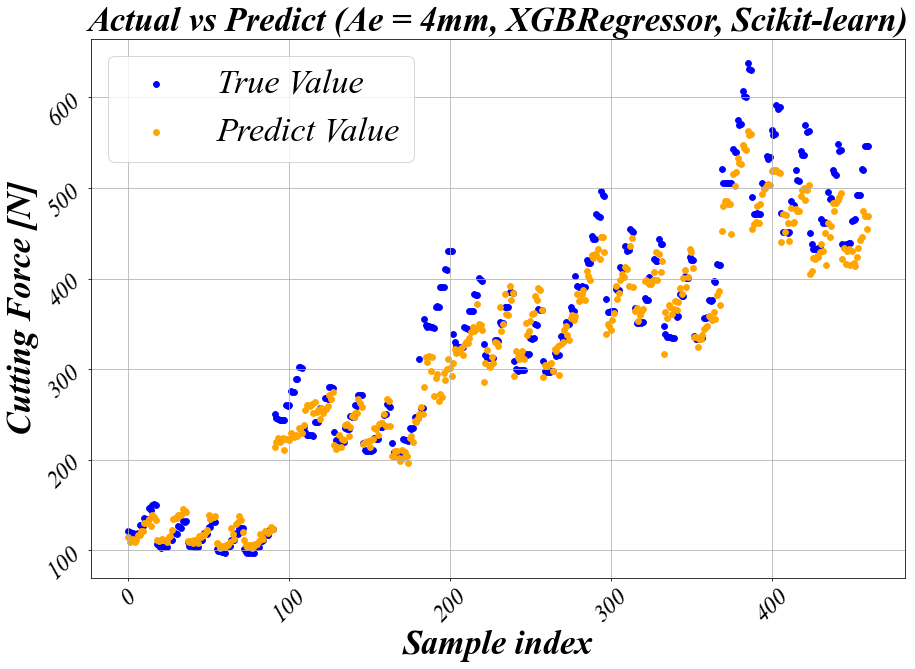

In [103]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ae = 4mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

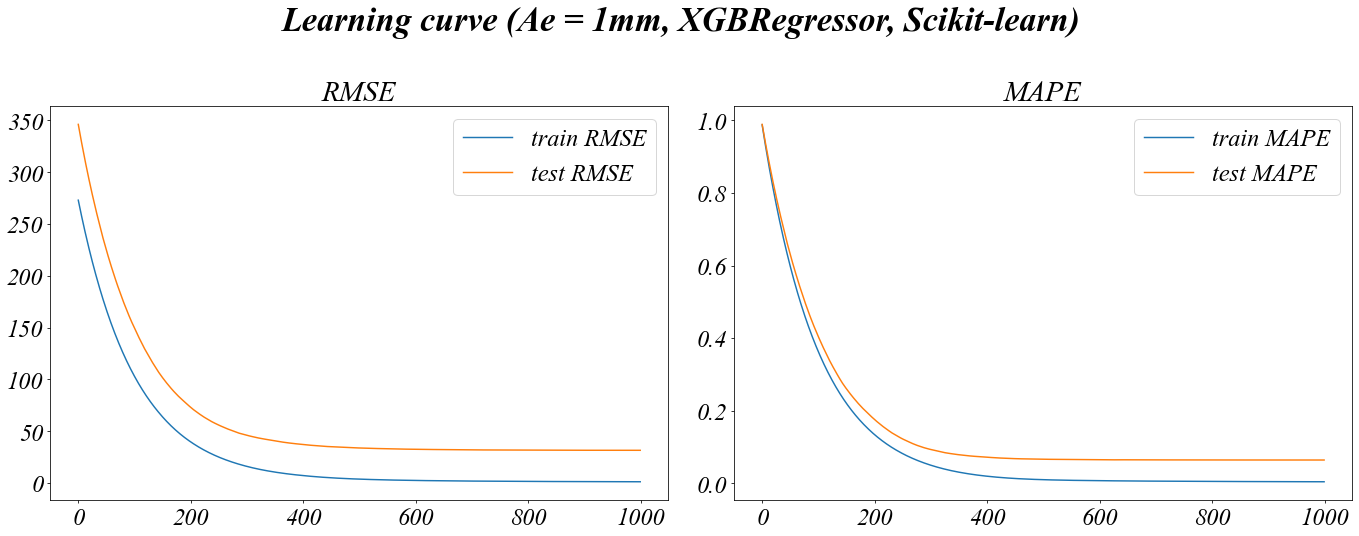

In [104]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ae = 1mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()